# Fast Style Transfer Deep Neural Network
### Galen Ballew, 02/18/2017
---

## Creating a conda environment
---
If you do not wish to install modules such as TensorFlow to your root $PATH, you can create a sandbox called an environment. Inside of this sandbox, you can install whatever you want and it will not interfere with your system. Often, this is used when you need to code in a different version of Python than what is installed on your system. Refer to the [documentation](https://conda.io/docs/using/envs.html) for additional information. 

```bash
#create environment
conda create --name nameofyourenviroment
```

```bash
#enter the environment
source activate nameofyourenvironment
```

```bash
conda install #whatever you need to install
```

```bash
#exit the environment
source deactivate
```

```bash
#delete environment
conda remove --name nameofyourenvironment --all
```

```bash
#see all current environments
conda info --envs
```

Before beginning, make sure your Jupyter Notebook is set up with your conda evirnoment. Check out this [StackOverfow](http://stackoverflow.com/questions/37085665/in-which-conda-environment-is-jupyter-executing) for details.

## Getting Ready
---


In [8]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython.display import Image, display

In [9]:
print("Python Version:", sys.version)
print()
print("Numpy Version:", np.__version__)
print()
print("TenfsorFlow:", tf.__version__)

Python Version: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

Numpy Version: 1.11.3

TenfsorFlow: 1.0.0


Checking your versions will help resolve any conflicts that might come up.

---
If you haven't already, download the workshop folder from Google Drive.  

[Link](https://drive.google.com/drive/folders/0B6Olt2UDdhRGcWYtTnd1VVBsSlE?usp=sharing)  

Let's take a look at the workshop directory.

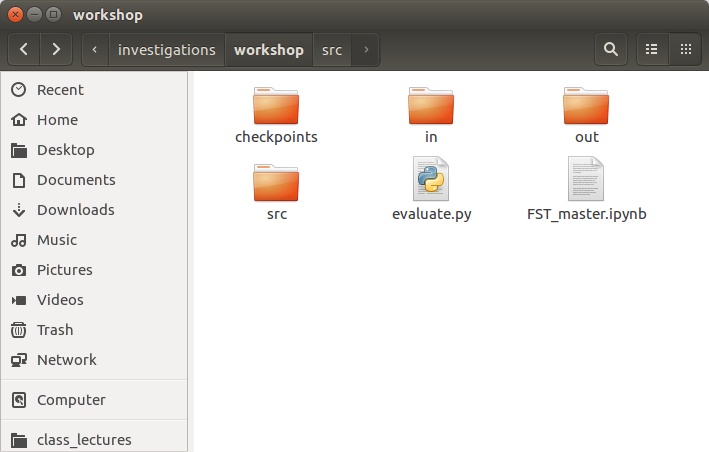

In [9]:
Image('src/cwd.png')

The first thing you'll want to do is put any images you are interested in transforming into the `in/` directory

## Transfer Learning 101
---

Whenever a pretrained model is repurposed for another task it is called ***transfer learning*** because your are transferring the learning (i.e. weights and biases) to a new model. There are several situations to be aware of when transfer learning and each has a different implementation.

#### The Four Possibilities:
1) **New data set is small and similar to the previous:** Since the new data set is small, you run the risk of overfitting if you retrained everything. Instead, slice off the last fully connected layer and replace with with a new fully connected layer with the appropriate output size. This makes sense because the similarity of the obersations (i.e. pictures) means both the low-level (e.g. edges) and high-level features (e.g. shapes) will be similiar. Freeze the weights before the last layer and retrain!
  
2) **New data set is large and similar to the previous:**  Since there is more data, there is less risk of overfitting by retraining. Freeze the low-level feature weights and retrain the high-level features to get a better generalization. Don't forget to replace the last fully connected layer! *Optional: If your data set is large enough to handle it, you can initialize all the layers with their previous weights/biases and retrain the entire network.*
  
3) **New data set is small and different than the previous:** This is the most difficult situation to deal with. Intuitively, we know that the previous network is finely-tuned at each layer. However, we do not want any of the high-level features ***and*** we **cannot** afford to retrain them because we could overfit. Instead, remove all of the fully connected layers and all of the high-level convolutional layers. All that should remain are the first few low-level convolutional layers. Place a fully connected layer with the correct number of outputs, freeze the rest of the layers, and retrain.  
  
4) **New data set is large and different than the previous:** Retrain the entire network. It's usually a good idea to instantiate the previous model's weights/biases to speed up training (lot's of the low-level convolutions will have similiar weights/biases). Don't forget to replace the fully connected output layer. 

You can read more about the practicalities of transfer learning [here.](http://cs231n.github.io/transfer-learning/)

## Why do I need to know this? 

Deep neural networks are very expensive to train. There has been years of trial and error experimentation regarding network architecture and hyper-parameter tuning. Currently, there exist sofisticated, open source networks that are pre-trained. By applying transfer learning, the time and effort required to create a solution is reduced *significantly*. You will most likely not build a network from scratch in industry - that is more academia's domain.

---
## What's it got to do with Fast Style Transfer?
The network we will use to create our artwork is a modified version of [VGG19](https://gist.github.com/baraldilorenzo/8d096f48a1be4a2d660d). The VGG19 DNN was originally trained for the [ImageNet Large Scale Visual Recognition Challenge 2014](http://image-net.org/challenges/LSVRC/2014/). This competition called for classification of 1,000 image types. VGG19 utilized 19 layers (holy shit) to achieve ~0.07405 classification error (they beat Google). You can bet your bottom dollar that the VGG19 network has *excellent* feature recognition. Specifically, we are taking advantage of the low-level features. The model will train on a "*style*" image and extract its low-level features. Then, those features are combined with the high level features of the image we want to stylize.

---

## Styles to Choose From

If we had a GPU or an AWS instance with GPU's, we could train the network on any style we wanted. Instead, there are 6 styles to choose from. Each of these styles is a model in it's own right. The modified VGG19 DNN was trained on each style in turn and then the model was saved as a checkpoint. 

|               |                   |              |            |
|:-----------------------------:|:-----------------------------:|
| checkpoints/la_muse.ckpt |<img src="src/thumbs/la_muse.jpg"> | <img src="src/thumbs/rain_princess.jpg"> | checkpoints/rain_princess.ckpt |
| checkpoints/the_scream.ckpt|<img src="src/thumbs/the_scream.jpg"> | <img src="src/thumbs/the_shipwreck_of_the_minotaur.jpg"> |checkpoints/the_shipwreck_of_the_minotaur.ckpt |
| checkpoints/udnie.ckpt|<img src="src/thumbs/udnie.jpg"> | <img src="src/thumbs/wave.jpg"> | checkpoints/wave.ckpt |

## Almost there.....
---
Before we make totally rad pix , let's go over a known depreciation in the code. Check your TensorFlow version - 

In [14]:
print("TenfsorFlow:", tf.__version__)

TenfsorFlow: 1.0.0


If you are running newer than 0.11.0, you will need to change a line in evaluate.py    

1) Open evaluate.py  
2) search for "tf.pack"  
3) replace with "tf.stack"  
4) save  

# THE MOMENT YOU'VE ALL BEEN WAITING FOR

<img src="src/spongebob.gif">

Edit the code below and execute! Make sure you enter the correct file extention for your image.  
## PLEASE NOTE - 
The program does not alter the filename. If you want to process more than one copy of an image, be sure to rename/move it before running the network again. 

In [ ]:
%%bash
python evaluate.py --checkpoint checkpoints/CHOOSE_STYLE_HERE.ckpt --in-path in/YOUR_IMAGE_HERE.jpeg --out-path out/

## The Results

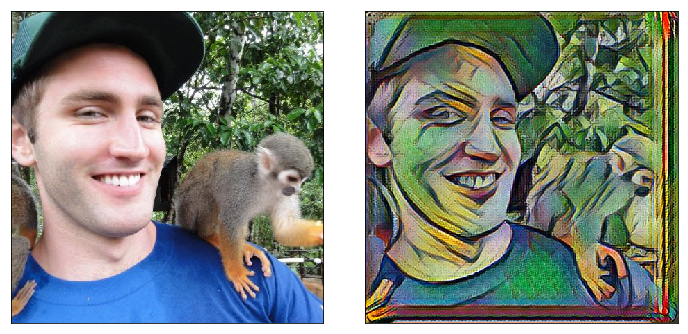

In [63]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

comparison = []

for before in os.listdir("in/"):
    for after in os.listdir("out/"):
        comparison.append(mpimg.imread('in/'+before))
        comparison.append(
            mpimg.imread('out/'+after))
#make a grid
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,20))
fig.tight_layout()
flat = [axis for axis in ax]

#hide the messy ticks 
for axis in flat:
    axis.set_xticks([])
    axis.set_yticks([])
    axis.tick1On = axis.tick2On = False
    axis.label1On = axis.label2On = False
    
#include the image and the label
for j in range(2):
    ax[j].imshow(comparison[i+j])  
plt.show();

## That's all folks
Remember, as with all deep neural networks, there are hella hyperparameters to tune. Going back and retraining the discriptor network with different params will yield weaker/stronger features at different scales.  

If you liked this, there are many style transfer networks available on GitHub. The one that we used today can be found [here.](https://github.com/lengstrom/fast-style-transfer)